In [1]:
import dnaio
from malva_client import MalvaClient
from malva_client.tools import mask_sequence

client = MalvaClient("https://malva.mdc-berlin.net", "atnGP11Mf4gBgrA-DeY2y0Mpil3B8AX8078qOxZDons")

INFO:malva_client.client:Connected to Malva API: healthy
INFO:malva_client.client:Authenticated successfully: free account


## Search a specific gene

In [3]:
results = client.search("FOXP3")
# results = client.search("ERVW-1")
# results = client.search("DROSHA")
# results = client.search("DICER1")
print(results)

INFO:malva_client.client:Search completed with job ID: 860660b3-a775-4125-9e18-b9575511536b


🔬 Malva Search Results
📊 Total cells: 7,576
🧬 Genes/sequences: 1
🧪 Samples: 2634
🔬 Cell types: 192
📈 Expression range: 0.000 - 255.041
📊 Mean expression: 2.181

ℹ️  Basic expression data only
💡 Run .enrich_with_metadata() to add sample metadata for filtering by:
   • Organ, disease, species
   • Study, laboratory, protocol
   • Age, sex, development stage

🔍 Available methods:
   • .filter_by(organ='brain', disease='normal')
   • .aggregate_by('cell_type')
   • .plot_expression_by('organ')
   • .available_filter_fields()


In [4]:
results.enrich_with_metadata()

✓ Enriched with metadata for 2634 samples


Total cells:,"7,576"
Genes/sequences:,1
Samples:,2634
Cell types:,192
Expression range:,0.000 - 255.041
Mean expression:,2.181


In [5]:
results.aggregate_by("cell_type", agg_func="median").head(20)

/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = self._df.groupby(resolved_group_cols)


,cell_type,median_norm_expr,n_observations,total_cells,n_samples
154,pre_B_cell,30.931807,1,63,1
8,CD4_effector_memory_T_cell,5.136268,3,65,3
4,CD4_Th17_cell,4.993114,6,114,6
6,CD4_Th2_cell,4.146733,81,791,81
15,CD8_positive_thymocyte,3.818384,2,48,2
65,double_negative_thymocyte,3.516803,2,54,2
3,CD4_Tfh_cell,3.006743,2,19,2
7,CD4_central_memory_T_cell,2.689708,1,11,1
151,plasmacytoid_dendritic_cell,2.293230,26,162,26
103,intestinal_stem_cell,2.279307,1,5,1


In [6]:
filter_data = results.filter_by(disease='normal')
avg_by_celltype = filter_data.aggregate_by('cell_type')

/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = self._df.groupby(resolved_group_cols)


In [7]:
avg_by_celltype

,cell_type,mean_norm_expr,n_observations,total_cells,n_samples
124,myeloid_cell,36.373232,1,21,1
154,pre_B_cell,30.931807,1,63,1
129,naive_CD4_T_cell,26.687121,6,320,6
8,CD4_effector_memory_T_cell,19.831834,1,60,1
161,regulatory_T_cell,18.947496,19,732,19
...,...,...,...,...,...
126,myoblast,NaN,0,0,0
164,retinal_pigment_epithelial_cell,NaN,0,0,0
177,theca_cell,NaN,0,0,0
186,tumor_associated_macrophage,NaN,0,0,0


In [8]:
enriched_results = results.enrich_with_metadata()
brain_data = enriched_results.filter_by(organ='brain', disease='normal')
organ_summary = enriched_results.aggregate_by('organ')

/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = self._df.groupby(resolved_group_cols)


In [9]:
organ_summary

,organ,mean_norm_expr,n_observations,total_cells,n_samples
36,mediastinal lymph node,17.032423,32,1112,4
4,blood,4.841537,2544,15600,530
27,immune organ,3.081312,15,169,4
6,blood || bone marrow || intestine || lung || l...,2.997190,195,2251,29
47,placenta,1.528471,45,238,17
...,...,...,...,...,...
16,digestive system,0.054046,1,1,1
55,skin of external ear,0.053025,1,1,1
68,white matter of cerebellum,0.045672,8,8,7
61,tendon,0.043062,1,1,1


/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:358: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories = (self._df.groupby(group_by)['norm_expr']
/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:394: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_counts = plot_data.groupby(group_by)['sample_id'].nunique().reindex(top_categories)
/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:409: FutureWarning: The default of observed=False is deprecated a


📊 Summary for Cell Type:
--------------------------------------------------
pre_B_cell: 1 samples, 63 cells, μ=30.932
regulatory_T_cell: 43 samples, 1,443 cells, μ=16.674
myeloid_cell: 4 samples, 31 cells, μ=10.183
naive_CD4_T_cell: 22 samples, 432 cells, μ=9.574
CD4_effector_memory_T_cell: 3 samples, 65 cells, μ=8.606
CD4_Th17_cell: 6 samples, 114 cells, μ=7.417
CD4_Th2_cell: 81 samples, 791 cells, μ=7.373
CD4_T_cell: 224 samples, 2,285 cells, μ=6.303
CD8_T_cell: 634 samples, 4,891 cells, μ=4.984
cDC2_dendritic_cell: 23 samples, 184 cells, μ=4.908


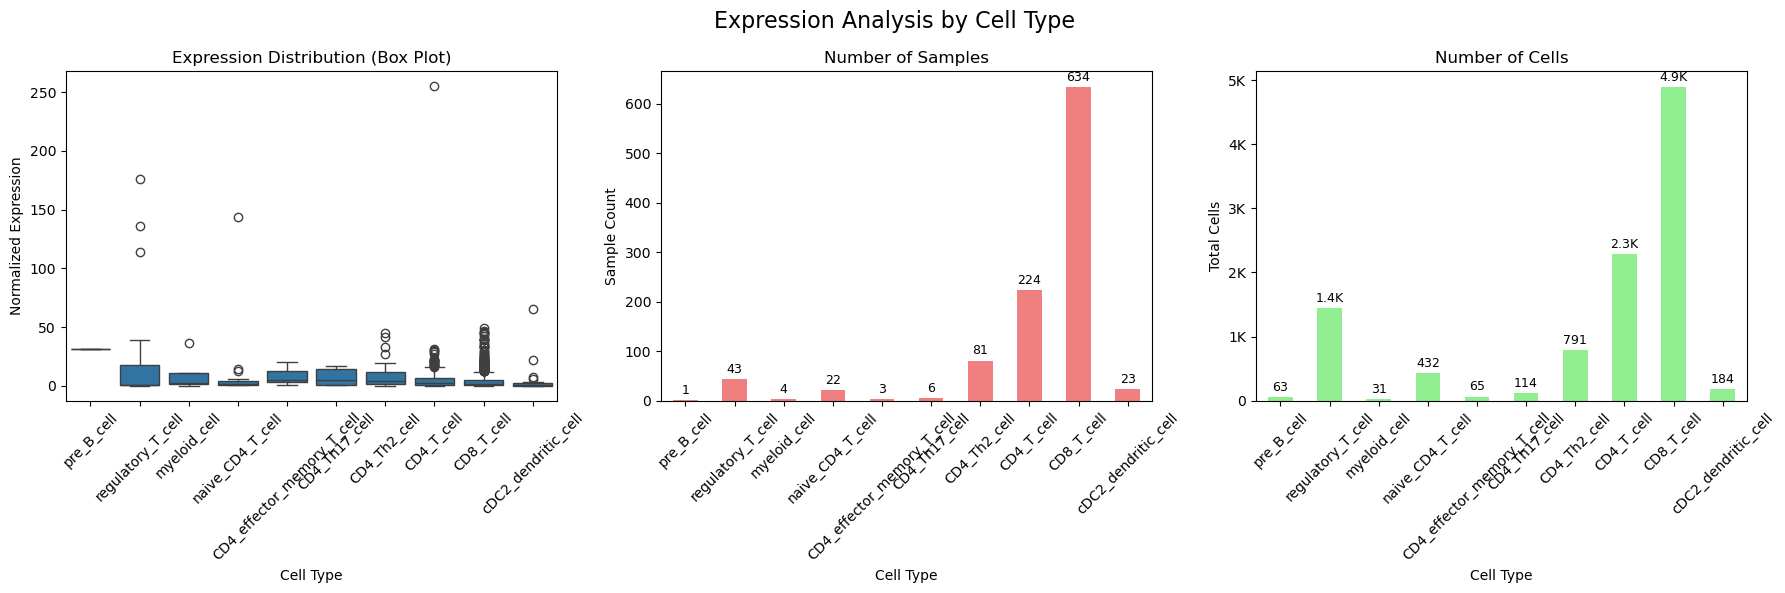

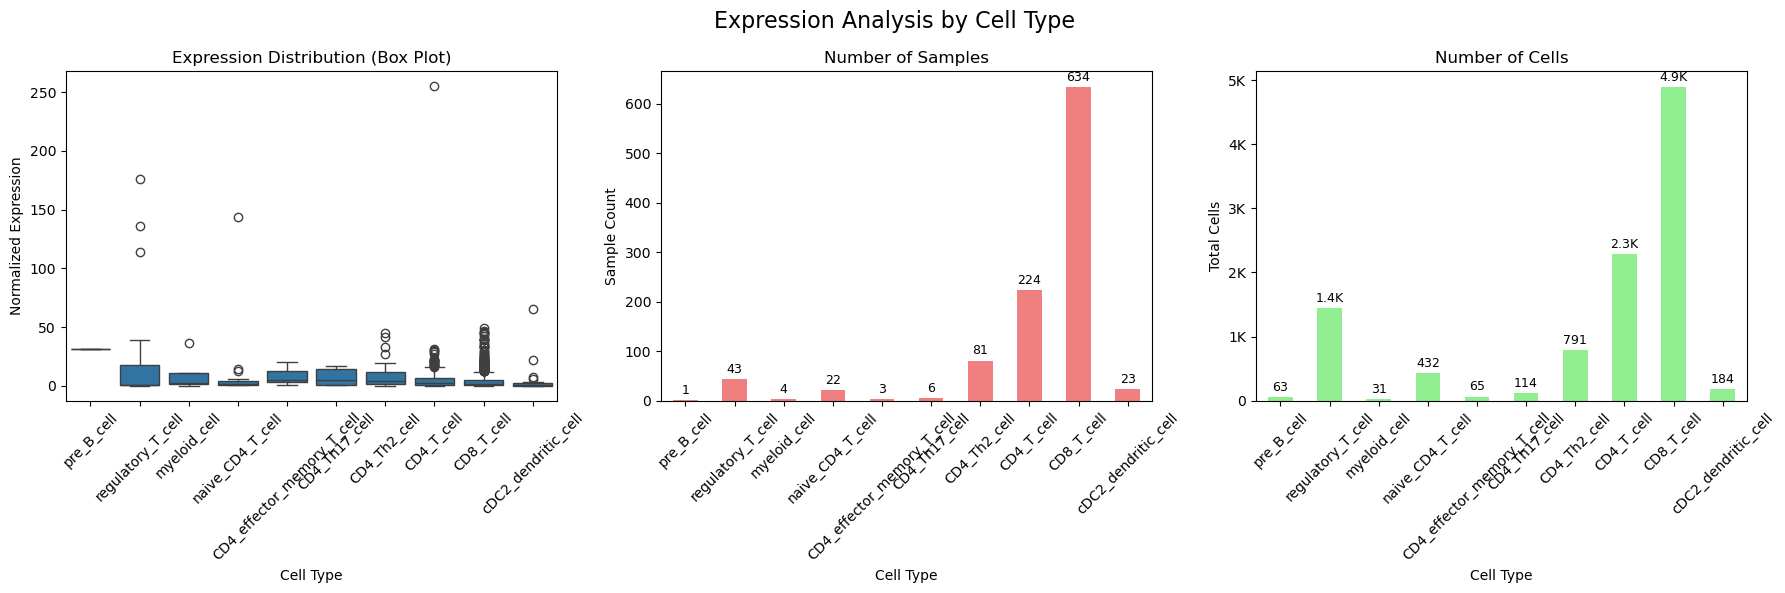

In [10]:
results.plot_expression_summary("cell_type")

## Search a specific sequence (e.g., from a FASTA file)

In [176]:
sequences = []

with dnaio.open("rna.fna") as f_fasta:
    for s in f_fasta:
        sequences.append(s.sequence)

In [183]:
results = client.search(sequences[0])
# results = client.search("ATTCAAAGTATCTTCTGGTGGGGACGAAGAGAGAGAGAGGAGAAAGGTTGCTTGCTGTGACTGGCAGGATTTTTTGAGCAGTCTGCTGCTTTCACTCCACTAA")
results.enrich_with_metadata()
print(results)

INFO:malva_client.client:Search completed with job ID: d94127a1-37ee-48b3-8933-4250ce7dfbdb


✓ Enriched with metadata for 219 samples
🔬 Malva Search Results
📊 Total cells: 1,317
🧬 Genes/sequences: 1
🧪 Samples: 219
🔬 Cell types: 150
📈 Expression range: 0.002 - 101.708
📊 Mean expression: 0.266

✅ Enriched with sample metadata
🏷️  Available metadata: organ, disease, species, study

🔍 Available methods:
   • .filter_by(organ='brain', disease='normal')
   • .aggregate_by('cell_type')
   • .plot_expression_by('organ')
   • .available_filter_fields()


/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:358: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories = (self._df.groupby(group_by)['norm_expr']
/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:394: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_counts = plot_data.groupby(group_by)['sample_id'].nunique().reindex(top_categories)
/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:409: FutureWarning: The default of observed=False is deprecated a


📊 Summary for Cell Type:
--------------------------------------------------
trophoblast_cell: 1 samples, 98 cells, μ=17.493
Unknown: 127 samples, 2,622 cells, μ=1.082
cytotrophoblast: 1 samples, 13 cells, μ=0.992
basal_epithelial_cell: 30 samples, 309 cells, μ=0.626
extravillous_trophoblast: 1 samples, 8 cells, μ=0.616
muscle_cell: 1 samples, 20 cells, μ=0.451
cardiomyocyte: 5 samples, 181 cells, μ=0.434
colonocyte: 7 samples, 68 cells, μ=0.430
amacrine_cell: 3 samples, 95 cells, μ=0.420
inhibitory_neuron: 7 samples, 284 cells, μ=0.420


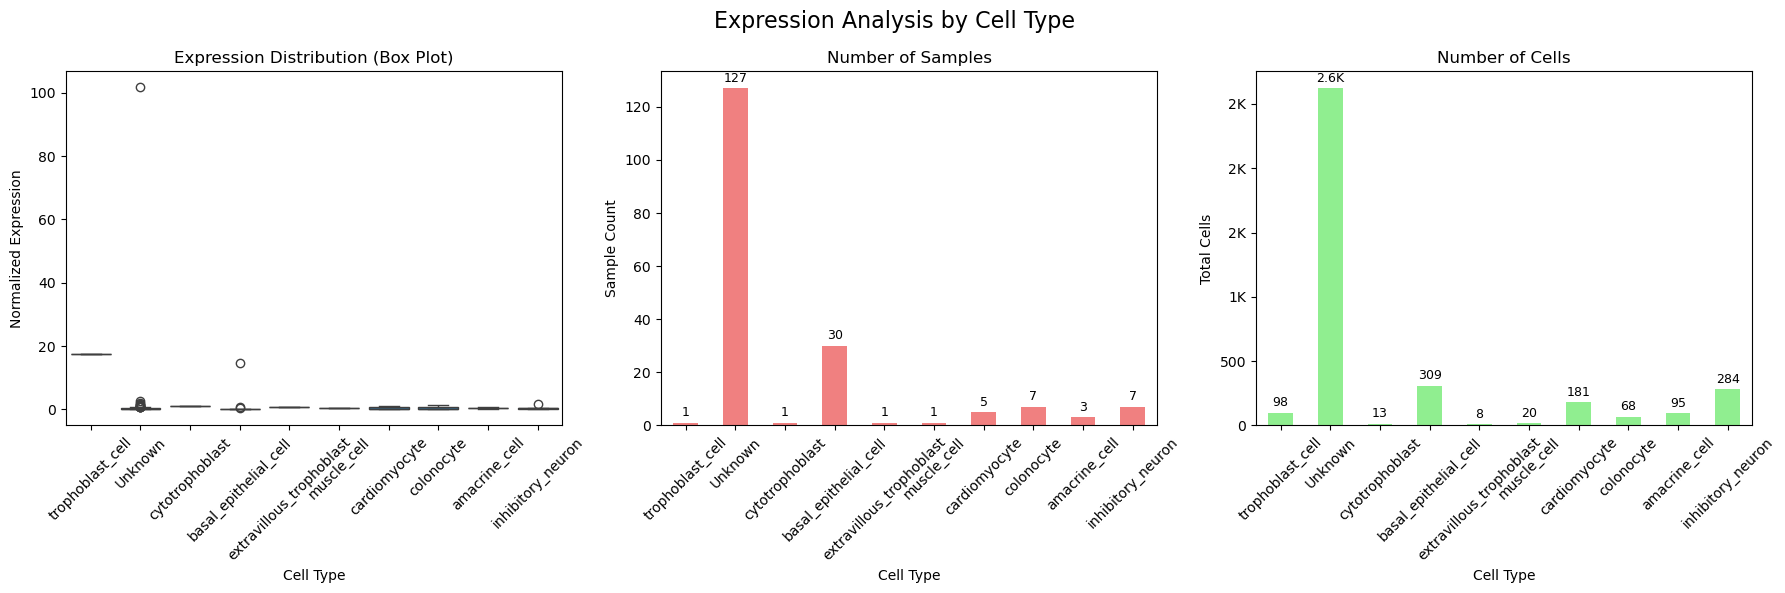

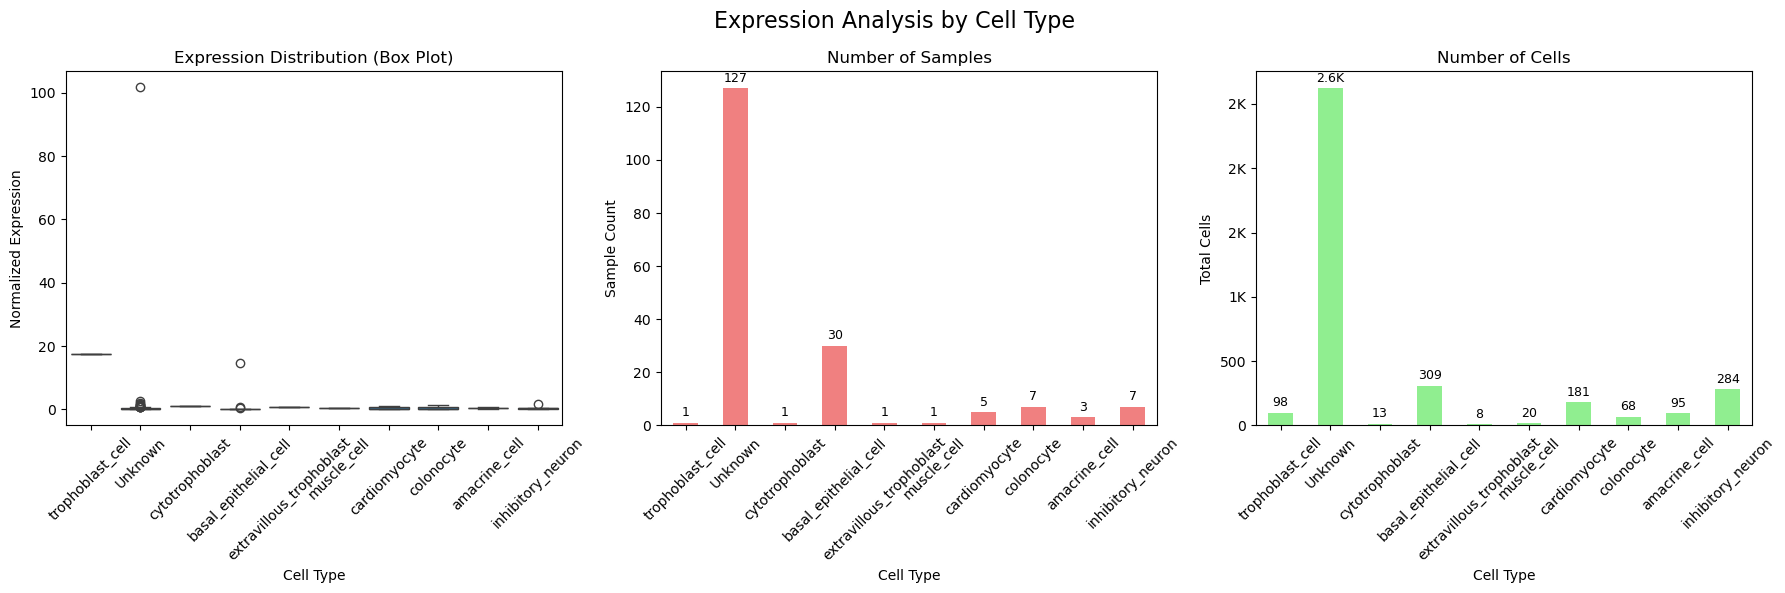

In [184]:
results.plot_expression_summary("cell_type")

In [187]:
results.aggregate_by("cell_type").dropna()

/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = self._df.groupby(resolved_group_cols)


,cell_type,mean_norm_expr,n_observations,total_cells,n_samples
143,trophoblast_cell,17.493222,1,98,1
20,Unknown,1.082262,127,2622,127
49,cytotrophoblast,0.991732,1,13,1
29,basal_epithelial_cell,0.625645,30,309,30
63,extravillous_trophoblast,0.616165,1,8,1
...,...,...,...,...,...
44,common_myeloid_progenitor,0.014819,1,2,1
21,acinar_cell,0.011573,1,1,1
100,naive_CD4_T_cell,0.010304,1,1,1
6,CD4_effector_memory_T_cell,0.006011,1,1,1


/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:268: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sort_values = plot_data.groupby(group_by)['norm_expr'].mean()


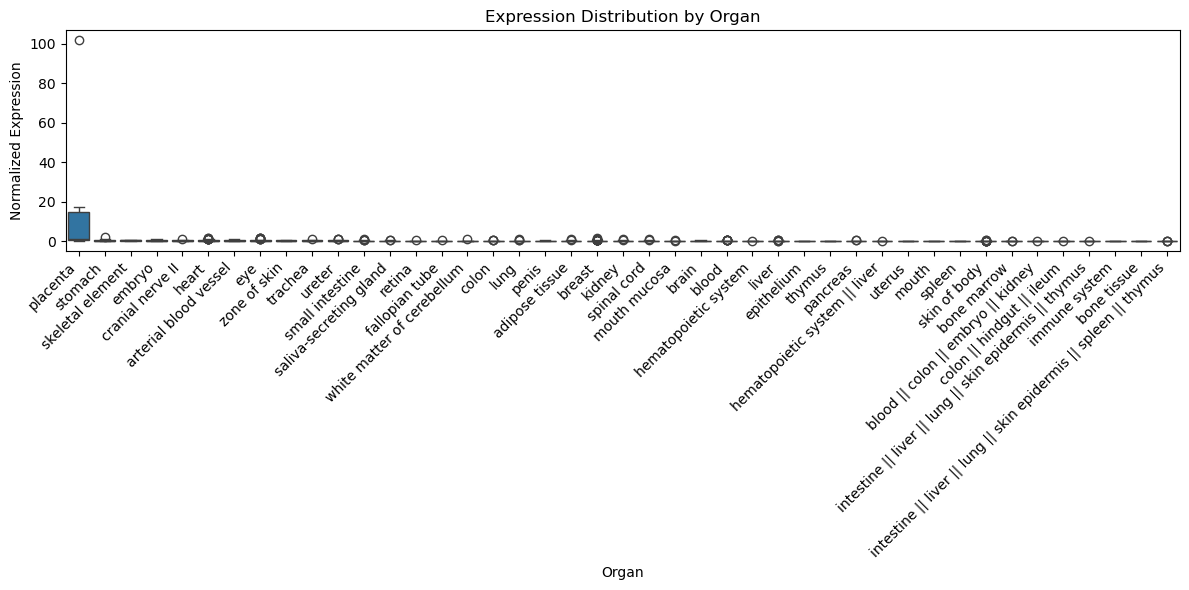

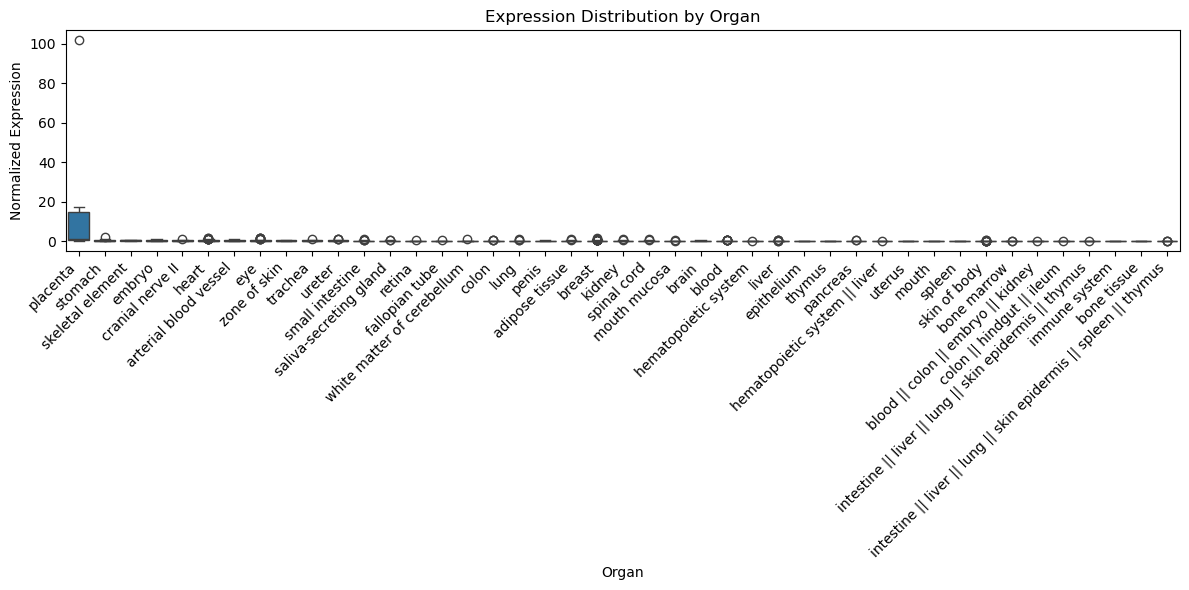

In [186]:
results.plot_expression_by("organ")

## Coverage Data Analysis

Now let's analyze expression coverage across a genomic region

In [3]:
coverage = client.get_coverage('chrX', 73_802_599, 73_870_805, strand='positive') # coverage for XIST (should be sex-specific)
# coverage = client.get_coverage('chr1', 198_612_628, 198_790_586, strand='positive') # coverage for PTPRC (same as web default)
print(coverage)

INFO:malva_client.client:Coverage analysis submitted with job ID: 9e3279e1-3ad2-4c70-ad69-191a3df456f4


🧬 Malva Coverage Results
📍 Region: chrX:73,802,599-73,870,805 (68,206 bp)
📊 Positions: 1,000
🧪 Samples: 132
📈 Coverage range: 0.000 - 38.217
📊 Mean coverage: 0.007
🔬 Cell types: 118
✅ Sample-level data available
🔬 Cell types detected: 118

ℹ️  Basic coverage data only
💡 Run .enrich_with_metadata() to add sample metadata for filtering by:
   • Organ, disease, species
   • Study, laboratory, protocol
   • Age, sex, development stage

🔍 Available methods (inherited from CoverageDataFrame):
   • .filter_by(organ='brain', cell_type='neuron')
   • .aggregate_by('cell_type')
   • .plot_expression_by('cell_type')  # plots coverage
   • .plot_coverage_summary('organ')
   • .available_fields()  # see all available fields
   • .available_filter_fields()  # see filterable fields
   • .filter_by_position(start=1000, end=2000)


In [4]:
coverage.enrich_with_metadata()

✓ Enriched with metadata for 132 samples


Region:,"chrX:73,802,599-73,870,805 (68,206 bp)"
Positions:,"1,000"
Samples:,132
Coverage range:,0.000 - 38.217
Mean coverage:,0.007
Cell types:,118
Data type:,Sample-level data available


/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:956: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_groups = self._df.groupby(group_by)['coverage'].mean().nlargest(limit).index


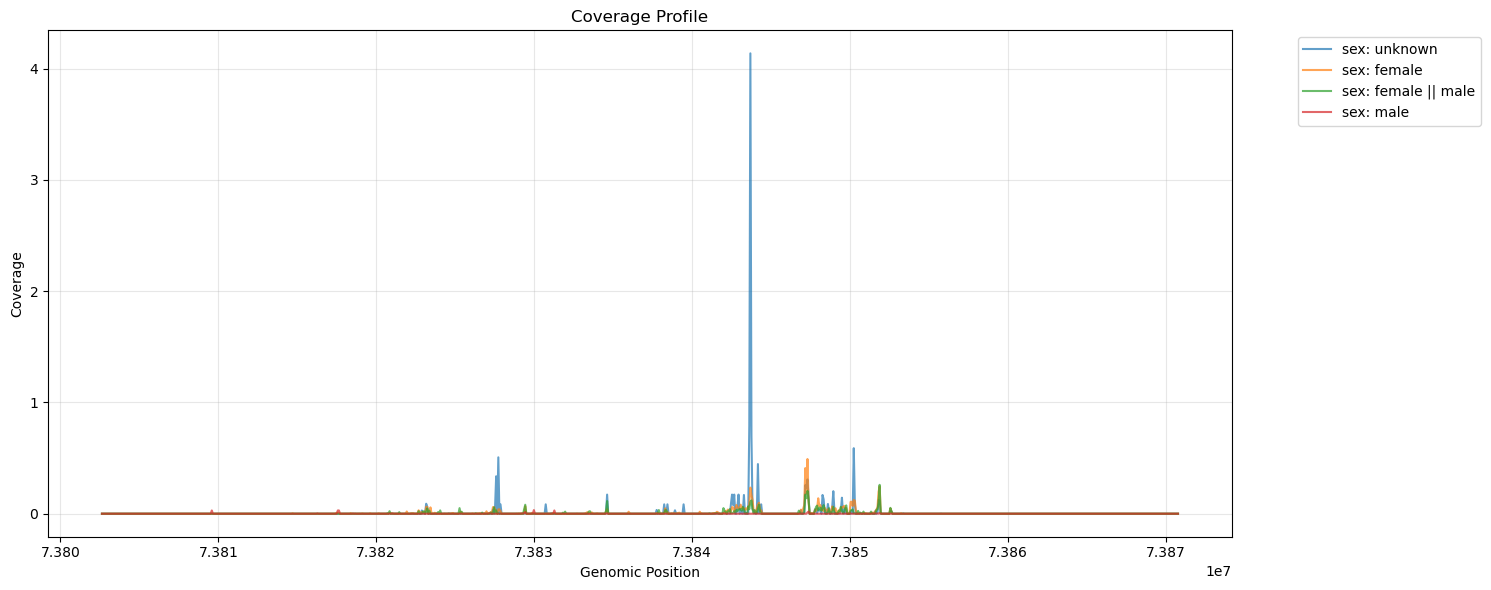

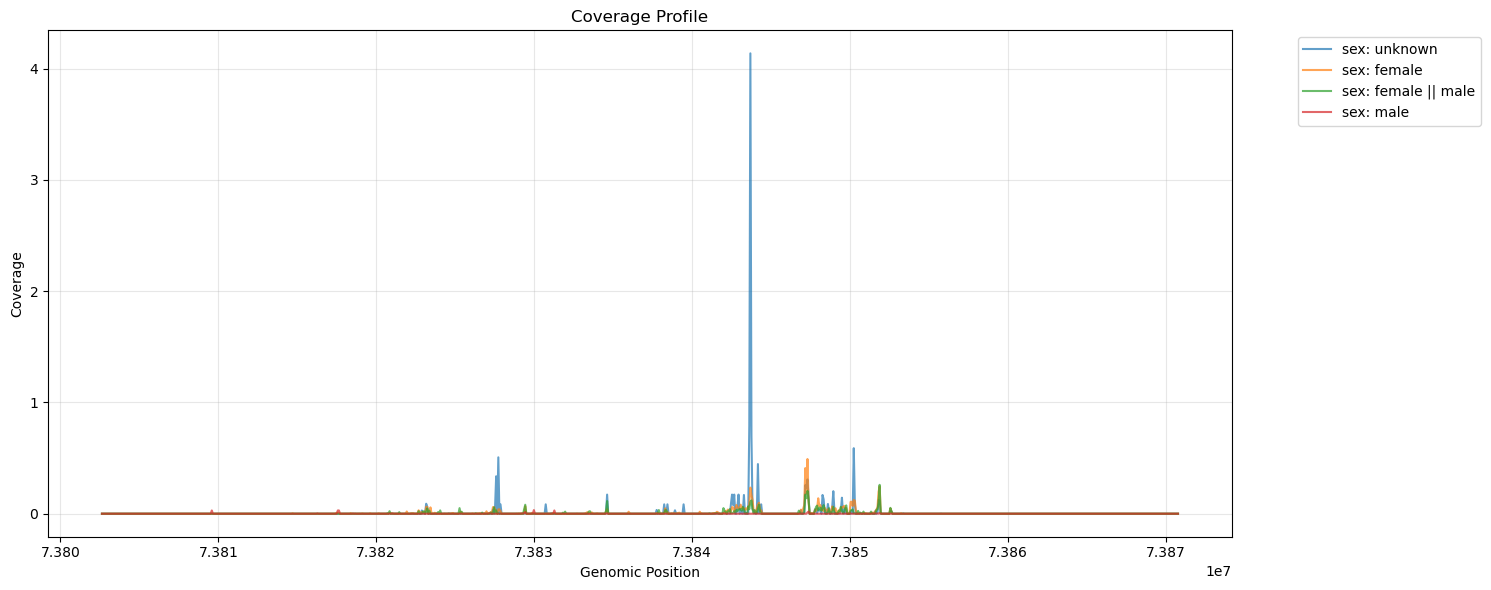

In [13]:
coverage.plot_coverage_profile("sex")

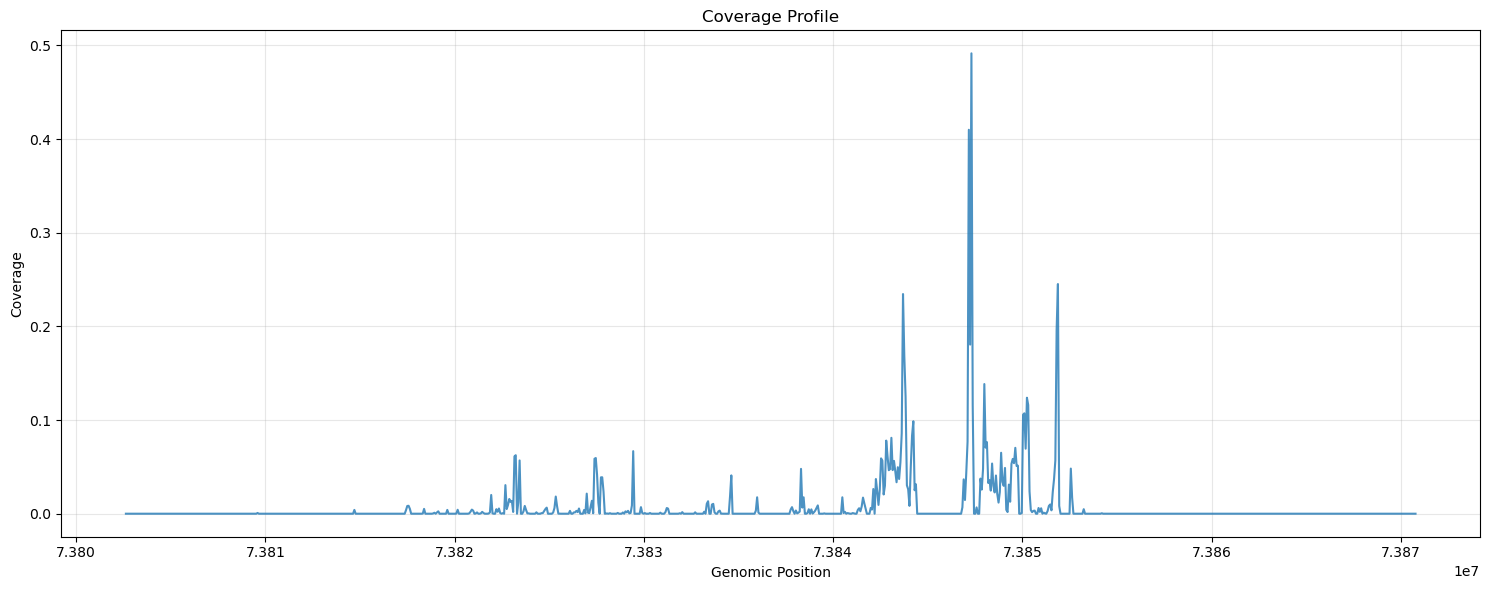

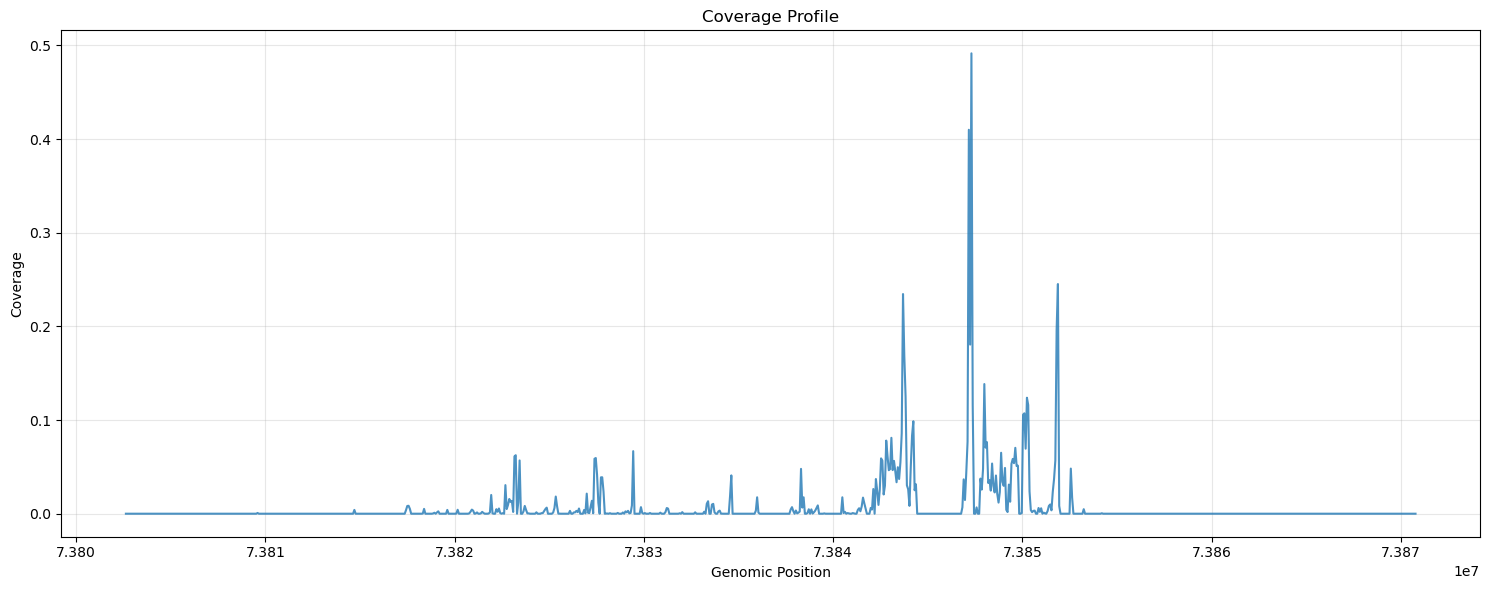

In [5]:
female_coverage = coverage.filter_by(sex='female')
female_coverage.plot_coverage_profile()

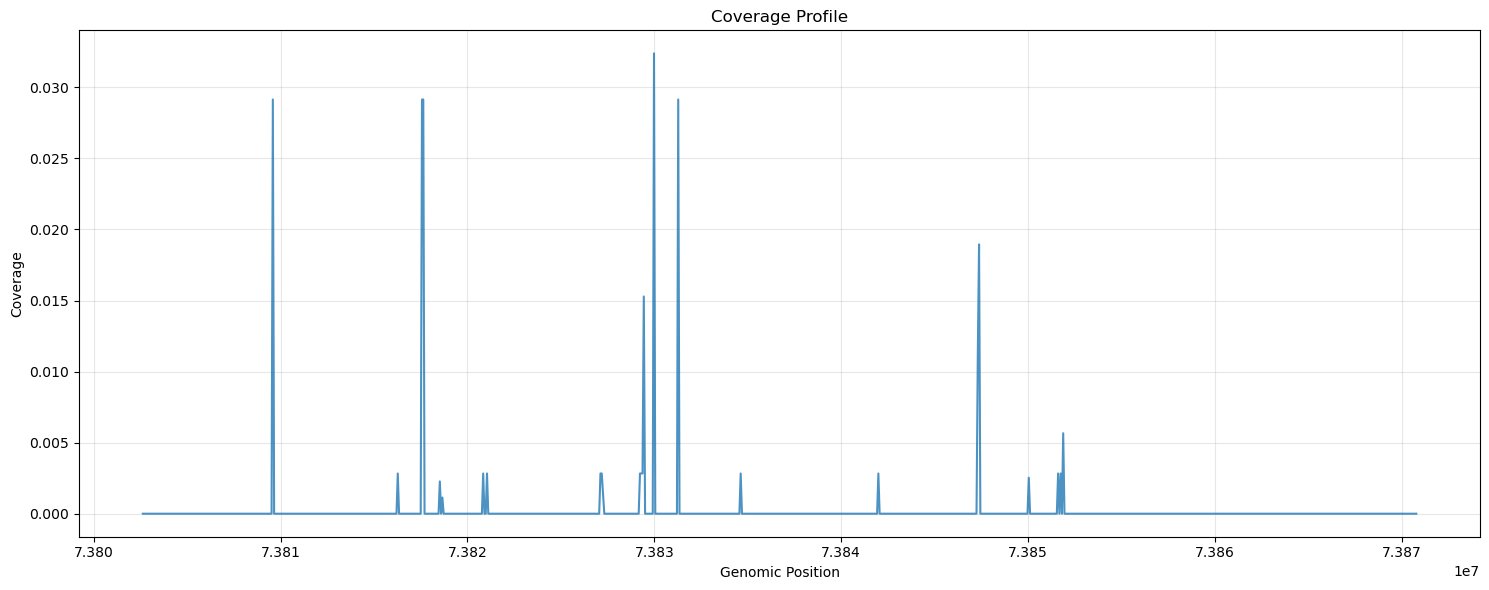

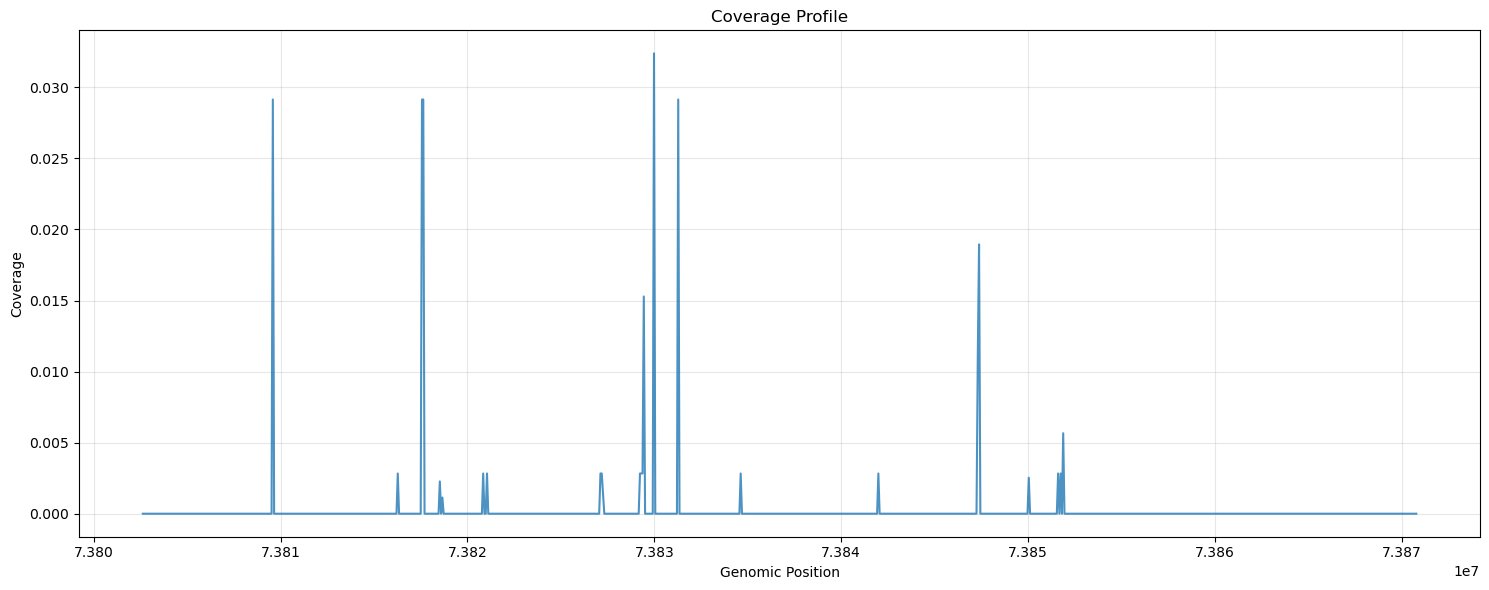

In [6]:
male_coverage = coverage.filter_by(sex='male')
male_coverage.plot_coverage_profile()

/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:1235: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_groups = self._df.groupby(group_by)['coverage'].mean().nlargest(limit).index.tolist()
/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:1246: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_counts = plot_data.groupby(group_by)['sample_id'].nunique().reindex(top_groups)
/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:1261: FutureWarning: The default of


📊 Coverage Summary by Sex:
--------------------------------------------------
unknown: 7 samples, 1000 positions, μ=0.012
female: 97 samples, 1000 positions, μ=0.007
female || male: 22 samples, 1000 positions, μ=0.004
male: 6 samples, 1000 positions, μ=0.000


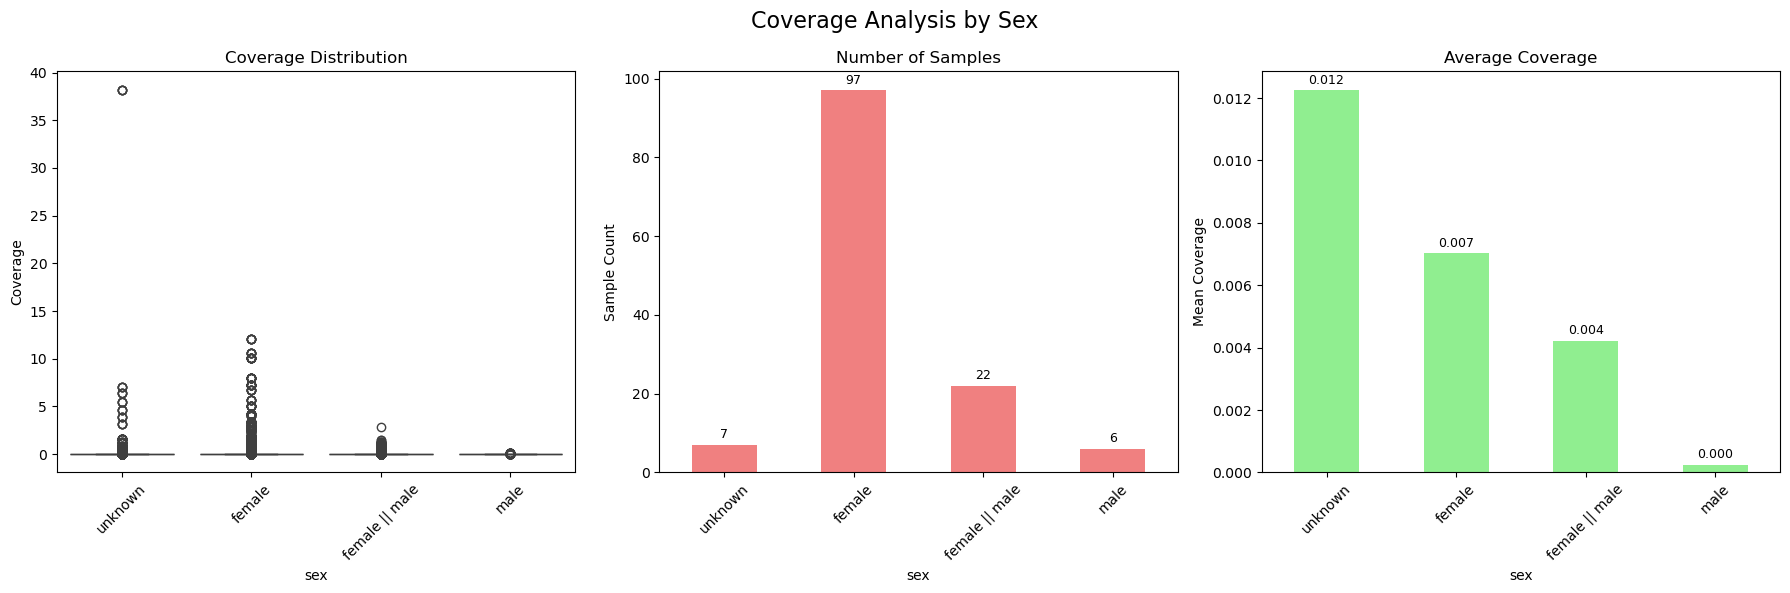

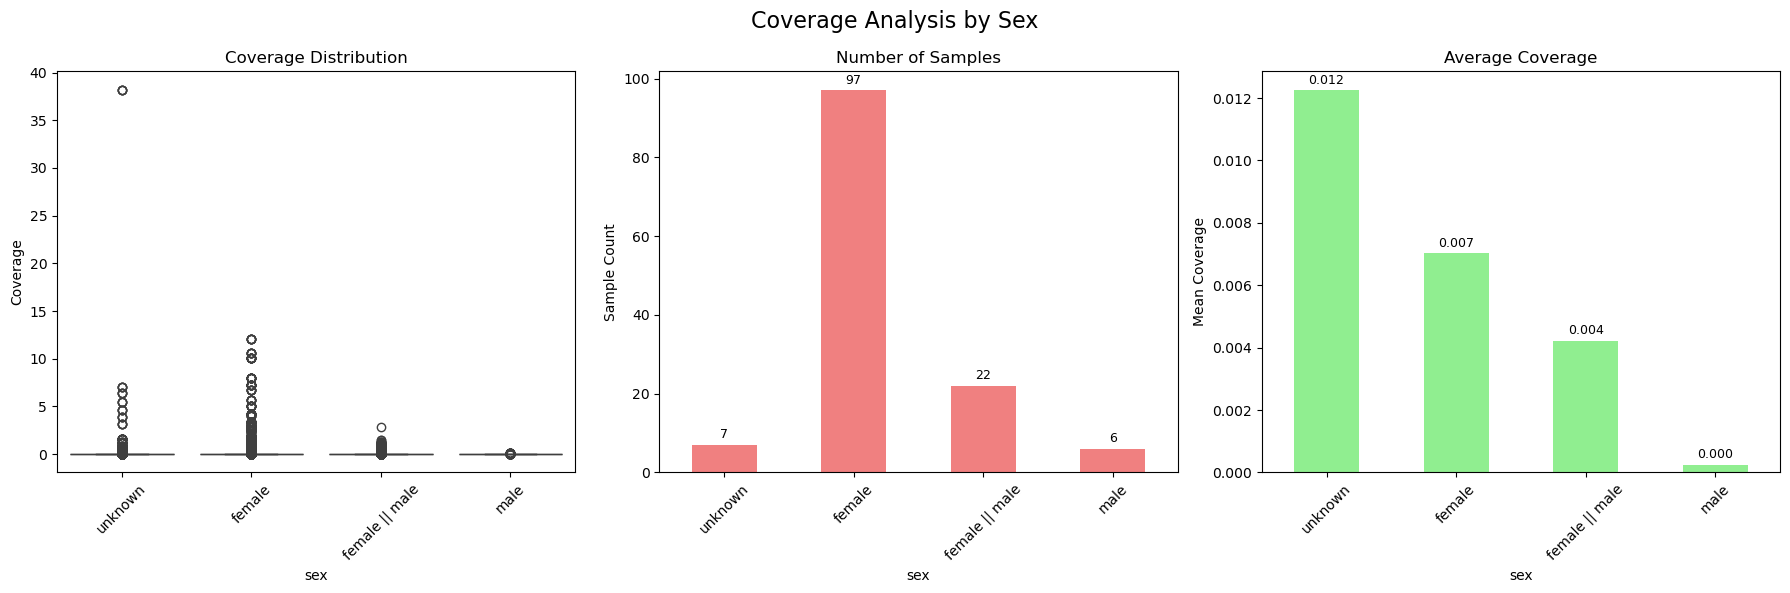

In [11]:
coverage.plot_coverage_summary("sex")